In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
  
)
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv('./DataSets/heart.csv')

# -----------------------------
# Remove duplicates
# -----------------------------
print("Before:", df.shape)
df.drop_duplicates(inplace=True)
print("After:", df.shape)

# -----------------------------
# Columns
# -----------------------------
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# -----------------------------
# Replace outliers with NaN
# -----------------------------
def replace_outliers_with_nulls(data, columns):
    df_copy = data.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df_copy.loc[(df_copy[col] < lower_limit) | (df_copy[col] > upper_limit), col] = np.nan

    return df_copy

df_clean = replace_outliers_with_nulls(df, numerical_cols)

# -----------------------------
# Fill missing numeric by mean, categorical by mode
# -----------------------------
for col in numerical_cols:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# -----------------------------
# Normalize numerical columns
# -----------------------------
scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# -----------------------------
# Split X / y
# -----------------------------
X_cat = df_clean[categorical_cols].values
X_num = df_clean[numerical_cols].values
y = df_clean["target"].values

X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train hybrid models
# -----------------------------
nb_cat = CategoricalNB()
nb_num = GaussianNB()

nb_cat.fit(X_cat_train, y_train)
nb_num.fit(X_num_train, y_train)

# -----------------------------
# Hybrid prediction function
# -----------------------------
def hybrid_predict(X_cat, X_num):
    p_cat = nb_cat.predict_proba(X_cat)
    p_num = nb_num.predict_proba(X_num)

    combined = p_cat * p_num
    combined = combined / combined.sum(axis=1, keepdims=True)

    return np.argmax(combined, axis=1)

# -----------------------------
# Evaluate
# -----------------------------
y_pred = hybrid_predict(X_cat_test, X_num_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Before: (303, 14)
After: (302, 14)
Accuracy: 0.8524590163934426

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



C:\Users\Eslam\AppData\Local\Temp\ipykernel_72448\1827193995.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\Eslam\AppData\Local\Temp\ipykernel_72448\1827193995.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [2]:
print("Hybrid Naive Bayes Accuracy:", accuracy)

Hybrid Naive Bayes Accuracy: 0.8360655737704918


In [3]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61




Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Accuracy: 0.8524590163934426


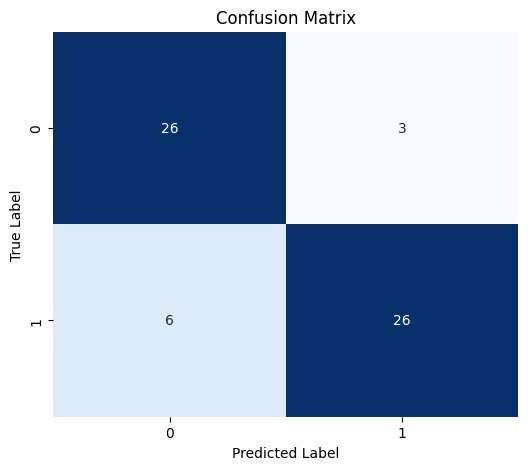

In [6]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
